In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

base_dir=r'D:\kaggle\ab test'
os.chdir(base_dir)



In [2]:
df = pd.read_csv('cookie_cats.csv')
df.head()


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


No missing value.

There are 90189 records. No duplicated userid or duplicates. 

In [3]:
# check missing value
df.info()
#df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [4]:
df.userid.nunique()
# df[df.userid.duplicated(keep=False)].sort_values(by = 'userid').head(10)

90189

About 3994 players (4.43% of the total) downloaded and installed the game but never play this game. 

One user played the game 49854 rounds. Others plays less or equal to 2961 rounds.

In [5]:
df.groupby(['sum_gamerounds'])['userid'].count()[0]/len(df)*100

4.42847797403231

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64


C:\Users\xurui\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_gamerounds'>

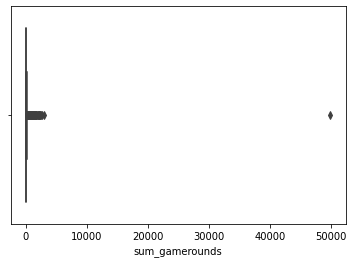

In [6]:
# outliers
print(df.groupby(['sum_gamerounds'])['userid'].count())
sns.boxplot(df['sum_gamerounds'])

In [7]:
df.describe([0.001, 0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99, 0.999])[['sum_gamerounds']].T

,count,mean,std,min,0.1%,1%,5%,10%,20%,50%,80%,90%,95%,99%,99.9%,max
sum_gamerounds,90189.0,51.872457,195.050858,0.0,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,1073.624,49854.0


High boundary 120.0
Low boundary -64.0


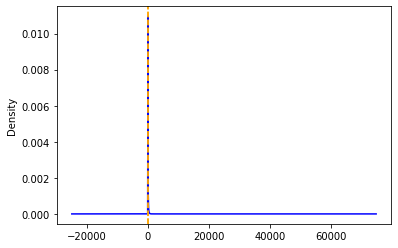

In [8]:
percentile25 = df['sum_gamerounds'].quantile(0.25)
percentile75 = df['sum_gamerounds'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("High boundary",upper_limit)
print("Low boundary",lower_limit)
df['sum_gamerounds'].plot(kind = 'density', c='b')
plt.axvline(x=upper_limit,c='orange', linestyle="dashed")
plt.axvline(x=lower_limit, c='orange', linestyle="dashed")

In [9]:
df[(df['sum_gamerounds']>upper_limit)|(df['sum_gamerounds']<lower_limit)]

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
9,1587,gate_40,153,True,False
14,2218,gate_30,305,True,True
...,...,...,...,...,...
90121,9991145,gate_30,328,True,True
90125,9991408,gate_40,186,True,True
90134,9991949,gate_30,191,True,True
90150,9995412,gate_40,253,True,True


In [10]:
def triming(df, column,upper_limit,lower_limit):
    new_df = df[(df[column] < upper_limit)&(df[column] > lower_limit)]
    return new_df
def capping(df, column,upper_limit,lower_limit):
    new_df = np.where(df[column]>upper_limit, upper_limit,
    np.where(df[column]<lower_limit, lower_limit, df[column]))
    return new_df

If apply iqr based filtering, 10173 record will be trimed or capped. Not suitable for this situation. 

Remove the extreme value. 

Text(0.5, 1.0, 'game rounds before remove extreme value')

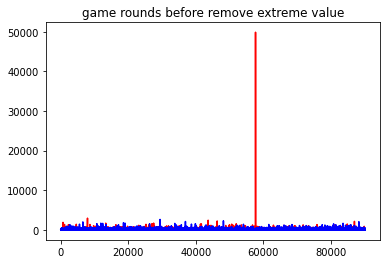

In [11]:
df[df['version']=='gate_30']['sum_gamerounds'].plot(c='r')
df[df['version']=='gate_40']['sum_gamerounds'].plot(c='b')

plt.title('game rounds before remove extreme value')

sum_gamerounds
0       3994
1       5538
2       4606
3       3958
4       3629
        ... 
2251       1
2294       1
2438       1
2640       1
2961       1
Name: userid, Length: 941, dtype: int64


C:\Users\xurui\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_gamerounds'>

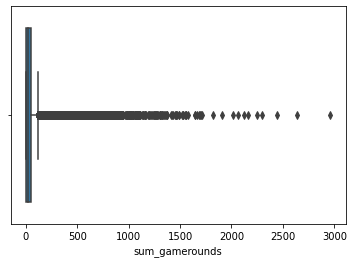

In [12]:
# remove outlier - the maximum value
df = df[df['sum_gamerounds'] < max(df['sum_gamerounds'])]
print(df.groupby(['sum_gamerounds'])['userid'].count())
sns.boxplot(df['sum_gamerounds'])

Text(0.5, 1.0, 'game rounds before remove extreme value')

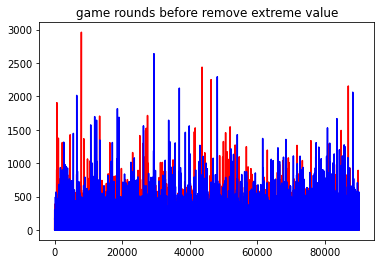

In [13]:
df[df['version']=='gate_30']['sum_gamerounds'].plot(c='r')
df[df['version']=='gate_40']['sum_gamerounds'].plot(c='b')

plt.title('game rounds before remove extreme value')

In [14]:
# group info
groups = df.groupby('version').count().index.values
n_groups = df.groupby('version')['userid'].count().values
print('Group {0} have {1} samples, respectively.'.format(groups, n_groups))
df.groupby('version')[['sum_gamerounds','retention_1','retention_7']].mean()

Group ['gate_30' 'gate_40'] have [44699 45489] samples, respectively.


,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,51.342111,0.448198,0.190183
gate_40,51.298776,0.442283,0.182000


In [15]:
df[['sum_gamerounds','retention_1','retention_7']].mean()

sum_gamerounds    51.320253
retention_1        0.445214
retention_7        0.186056
dtype: float64

In [16]:
df.groupby("version").sum_gamerounds.agg([lambda x: str(round(x.count()/len(df)*100,2))+' %','count', "median", "mean", "std", "max"])

,<lambda_0>,count,median,mean,std,max
version,,,,,,
gate_30,49.56 %,44699,17,51.342111,102.057598,2961
gate_40,50.44 %,45489,16,51.298776,103.294416,2640


We assume that the sample size of control and test group are the same.  50/50 split for two groups.

The sample size of two groups are roughly the same.


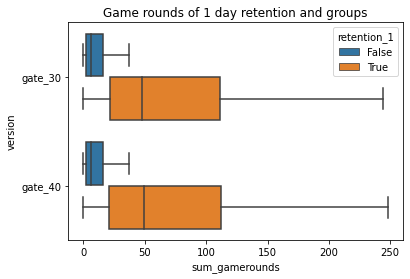

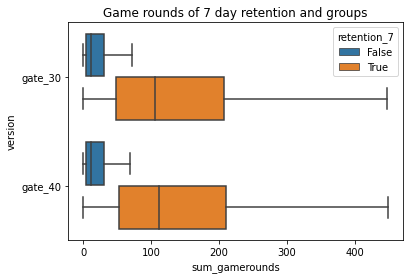

In [17]:
# visuallization
sns.boxplot(x=df['sum_gamerounds'], y=df['version'], hue=df['retention_1'], showfliers=False)
plt.title('Game rounds of 1 day retention and groups')
plt.show()
sns.boxplot(x=df['sum_gamerounds'], y=df['version'], hue=df['retention_7'], showfliers=False)
plt.title('Game rounds of 7 day retention and groups')
plt.show()

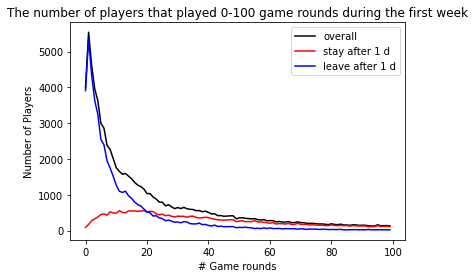

In [18]:
df.groupby(['sum_gamerounds'])['userid'].count()[:100].plot(c='black', label='overall')
plt.plot(df[df['retention_1']==True].groupby(['sum_gamerounds'])['userid'].count()[:100], c='r', label='stay after 1 d')
plt.plot(df[df['retention_1']==False].groupby(['sum_gamerounds'])['userid'].count()[:100], c='b', label='leave after 1 d')
plt.legend()
plt.title("The number of players that played 0-100 game rounds during the first week")
plt.ylabel("Number of Players")
plt.xlabel('# Game rounds')
plt.show()

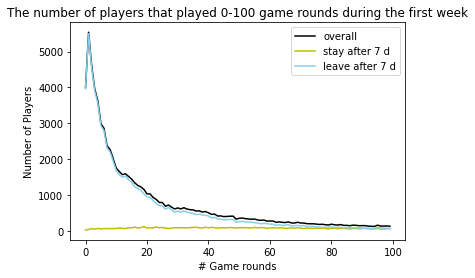

In [19]:
df.groupby(['sum_gamerounds'])['userid'].count()[:100].plot(c='black', label='overall')
plt.plot(df[df['retention_7']==True].groupby(['sum_gamerounds'])['userid'].count()[:100], c='y', label='stay after 7 d')
plt.plot(df[df['retention_7']==False].groupby(['sum_gamerounds'])['userid'].count()[:100], c='skyblue', label='leave after 7 d')
plt.legend()
plt.title("The number of players that played 0-100 game rounds during the first week")
plt.ylabel("Number of Players")
plt.xlabel('# Game rounds')
plt.show()

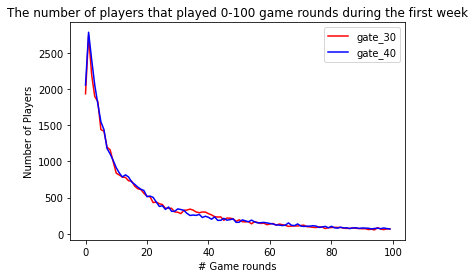

In [20]:
plt.plot(df[(df['version']=='gate_30')].groupby(['sum_gamerounds'])['userid'].count()[:100], c='r', label='gate_30')
plt.plot(df[(df['version']=='gate_40')].groupby(['sum_gamerounds'])['userid'].count()[:100], c='b', label='gate_40')
plt.legend()
plt.title("The number of players that played 0-100 game rounds during the first week")
plt.ylabel("Number of Players")
plt.xlabel('# Game rounds')
plt.show()

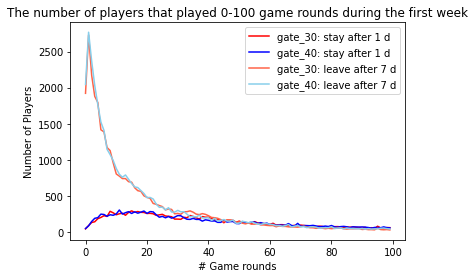

In [21]:
plt.plot(df[(df['version']=='gate_30')&(df['retention_1']==True)].groupby(['sum_gamerounds'])['userid'].count()[:100], c='r', label='gate_30: stay after 1 d')
plt.plot(df[(df['version']=='gate_40')&(df['retention_1']==True)].groupby(['sum_gamerounds'])['userid'].count()[:100], c='b', label='gate_40: stay after 1 d')
plt.plot(df[(df['version']=='gate_30')&(df['retention_7']==False)].groupby(['sum_gamerounds'])['userid'].count()[:100], c='tomato', label='gate_30: leave after 7 d')
plt.plot(df[(df['version']=='gate_40')&(df['retention_7']==False)].groupby(['sum_gamerounds'])['userid'].count()[:100], c='skyblue', label='gate_40: leave after 7 d')
plt.legend()
plt.title("The number of players that played 0-100 game rounds during the first week")
plt.ylabel("Number of Players")
plt.xlabel('# Game rounds')
plt.show()

In [22]:
# retention
df.groupby(['version', 'retention_1','retention_7'])['sum_gamerounds'].agg(['count','min','median','mean', 'std', 'max'])


count  min  median        mean         std  \
version retention_1 retention_7                                               
gate_30 False       False        22840    0       6   11.819746   21.642643   
                    True          1825    0      43   73.169315   93.222330   
        True        False        13358    0      33   49.694490   58.125396   
                    True          6676    0     127  183.886309  189.626390   
gate_40 False       False        23597    0       6   11.913294   20.901020   
                    True          1773    0      47   75.261139   94.478048   
        True        False        13613    0      32   50.025490   60.924587   
                    True          6506    0     133  190.282355  194.220077   

                                  max  
version retention_1 retention_7        
gate_30 False       False         981  
                    True         1072  
        True        False         918  
                    True         2961  
gate_40 False       False         547  
                    True         1241  
        True        False        2640  
                    True         2294

In [23]:
df['NewRetention'] = list(map(lambda x,y: str(x)+'-'+str(y), df.retention_1, df.retention_7))
df.groupby(['version', 'NewRetention']).sum_gamerounds.agg(['count','min','median','mean', 'std', 'max']).reset_index()

,version,NewRetention,count,min,median,mean,std,max
0,gate_30,False-False,22840,0,6,11.819746,21.642643,981
1,gate_30,False-True,1825,0,43,73.169315,93.222330,1072
2,gate_30,True-False,13358,0,33,49.694490,58.125396,918
3,gate_30,True-True,6676,0,127,183.886309,189.626390,2961
4,gate_40,False-False,23597,0,6,11.913294,20.901020,547
5,gate_40,False-True,1773,0,47,75.261139,94.478048,1241
6,gate_40,True-False,13613,0,32,50.025490,60.924587,2640
7,gate_40,True-True,6506,0,133,190.282355,194.220077,2294
